# Garment productivit

# Importing Libraries

In [1]:

#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing Seaborn for statistical data visualization, built on top of Matplotlib.

import warnings
from rich import print
#-------------------------------------------------------------------------------------------------------------------------------

In [2]:
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
#pd.set_option("display.max_rows", 6)

warnings.filterwarnings('ignore')

# Data Understanding




### Data Acquisition & Description

a. How was it collected?

This dataset includes important attributes of the garment manufacturing process, it it's sent by our professor in the university.

c. The datasets used for the analysis is

dataProductivity Prediction of Garment Employeese.csv in my github account exactly in the folder data.

<hr>

### Data Information
Importing Data Set

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ziedtuihri/Data_Science_Projects/refs/heads/main/data/dataProductivity%20Prediction%20of%20Garment%20Employeese.csv",
    index_col=0,
)
df.head()


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,NaN,0.0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,NaN,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6.0,NaN,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382


In [4]:
df.tail()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
3/3/2015,Quarter1,finishing,Tuesday,2.0,0.4,3.90,NaN,6300.0,0.0,0.0,0.0,0.0,15.0,0.567378
2/24/2015,Quarter4,finishing,Tuesday,9.0,0.7,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.726933
2/14/2015,Quarter2,sweing,Saturday,11.0,0.6,11.41,1039.0,2280.0,23.0,0.0,0.0,NaN,55.0,0.600448
2/11/2015,Quarter2,finishing,Wednesday,12.0,0.8,4.08,NaN,1080.0,0.0,0.0,0.0,0.0,9.0,1.020000
2/25/2015,Quarter4,sweing,Wednesday,4.0,0.8,30.10,323.0,4080.0,50.0,0.0,0.0,1.0,59.0,0.800809


In [5]:
print('Data Shape:', df.shape)

Data Shape:
(1302, 14)

In [9]:
#Checking datatypes, null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 1/1/2015 to 2/25/2015
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1279 non-null   object 
 1   department             1275 non-null   object 
 2   day                    1274 non-null   object 
 3   team                   1278 non-null   float64
 4   targeted_productivity  1279 non-null   float64
 5   smv                    1276 non-null   float64
 6   wip                    729 non-null    float64
 7   over_time              1276 non-null   float64
 8   incentive              1275 non-null   float64
 9   idle_time              1275 non-null   float64
 10  idle_men               1278 non-null   float64
 11  no_of_style_change     1279 non-null   float64
 12  no_of_workers          1280 non-null   float64
 13  actual_productivity    1267 non-null   float64
dtypes: float64(11), object(3)
memory usage: 152.6+ KB

In [7]:
#descriptive analytics
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1278.000000,1279.000000,1276.000000,729.000000,1276.000000,1275.000000,1275.000000,1278.000000,1279.000000,1280.000000,1267.000000
mean,6.443662,0.730274,15.061418,1148.422497,4551.332288,36.967843,0.688235,0.357590,0.146990,34.553906,0.734889
std,3.468331,0.096727,10.989957,1596.736245,3347.164546,155.419707,12.316019,3.191313,0.422717,22.256752,0.173802
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,762.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650173
50%,7.000000,0.750000,15.260000,1040.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.763375
75%,9.000000,0.800000,24.260000,1255.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850354
max,12.000000,0.800000,54.560000,21540.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [8]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,NaN,0.0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,NaN,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6.0,NaN,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/3/2015,Quarter1,finishing,Tuesday,2.0,0.40,3.90,NaN,6300.0,0.0,0.0,0.0,0.0,15.0,0.567378
2/24/2015,Quarter4,finishing,Tuesday,9.0,0.70,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.726933
2/14/2015,Quarter2,sweing,Saturday,11.0,0.60,11.41,1039.0,2280.0,23.0,0.0,0.0,NaN,55.0,0.600448


# Data Cleaning

standard minute value (SMV)

Here’s a breakdown of Standard Minute Value (SMV) and why it matters:

Standard Minute Value (SMV):

SMV measures the amount of time (in minutes) required to complete a task or process under standard conditions.
It's commonly used in production and manufacturing settings, especially in garment production, to estimate how long a task should take for a trained worker to complete.
Purpose and Importance of SMV:

Efficiency & Costing: SMV helps in calculating the expected production time for garments and estimating labor costs, productivity, and efficiency.
Line Balancing: It aids in distributing tasks across workers to ensure a smooth workflow without bottlenecks.
Benchmarking: SMV is also used as a benchmark for comparing the actual time taken to complete a task, helping identify areas for improvement.
Use of 'smv':'std_minute_value':

This likely indicates that smv is the shorthand or column name in your dataset for the feature "Standard Minute Value".
In a DataFrame, it could look like df['smv'], representing each task or item’s standard minute value, which could then be used for calculating productivity, forecasting, and setting performance targets.

In [10]:
#renaming ambiguous columns
df = df.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

In [13]:

#checking for missing values
df.isnull().sum()

#573 null values in work in progress

,0
quarter,23
department,27
day,28
team,24
targeted_productivity,23
std_minute_value,26
work_in_progress,573
over_time,26
incentive,27
idle_time,27


In [14]:
# Checking for duplicates
df.duplicated().sum()

#no duplicates in the dataset

105

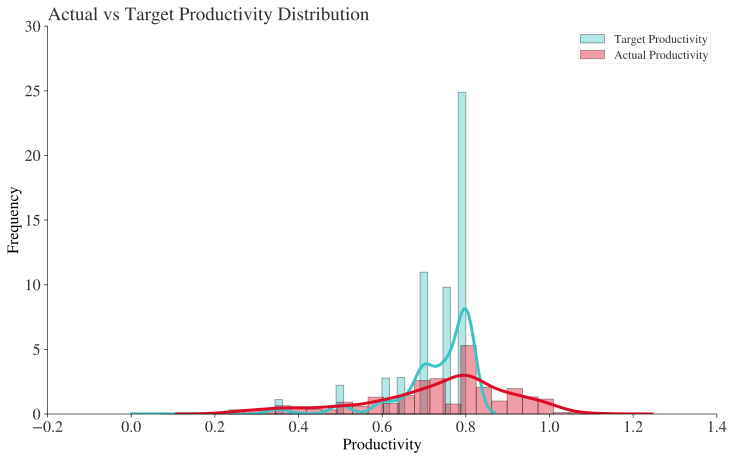

In [30]:
fig,ax =plt.subplots(figsize=(12, 7))
sns.set_color_codes("dark")
sns.set_palette(sns.color_palette("deep"))
sns.distplot(df["targeted_productivity"] , label='Target Productivity' , color="#3dc3c4");
sns.distplot(df["actual_productivity"] , label='Actual Productivity' , color="#dd0b25");
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.title('Actual vs Target Productivity Distribution')
plt.legend()